In [8]:
#写文档
#main target:get the R, T and CVvector

#classforself=ICP_3D(fromcloud=a,fromFEM=b,femVector=othervector)
#input the cloud points from CV and FEM and the FEM vector

#classforself.get_R_T()
#return R and T

#classforself.get_CvVector()
#return CVvector

#classforself.get_plot_a_b_new_B()
#visualize the cv cloud points, the FEM cloud points and the new FEM cloud points in 3d 
#we could alter the angle of the 3d show

In [9]:
import trimesh
import types
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
    
class ICP_3D(object):

    # 不以科学计数显示
    np.set_printoptions(suppress=True)

    #x,y,z=np.array(mesh.vertices)[;,0],np.array(mesh.vertices)[;,1],np.array(mesh.vertices)[;,2]
    
    """"     
    Used packages:
        import numpy as np
        import sympy as sy
        import scipy as sp
    """
    
    
    def __init__(self,fromcloud,fromFEM,femVector):#这是构造方法，当创建类的（实例）对象时，会自动调用，从而实现对类进行初始化操作
        
        self.fromcloud=fromcloud
        self.fromFEM=fromFEM
        self.FEMvector=femVector


    #定义函数
    def get_R_T(self,targetPoints, sourcePoints,FEMvector):
        '''
        ICP_3D_SVD ICP 配准算法
        '''
        A = self.fromcloud #targetPoints  # A是目标点云（地图值）
        B = self.fromFEM #sourcePoints  # B是源点云（感知值）
        
        
        A_mean = np.mean(A, axis=1).reshape((3, 1))
        B_mean = np.mean(B, axis=1).reshape((3, 1))
        A_ = A - A_mean
        B_ = B - B_mean


        # 奇异值SVD分解
        H = np.matmul(B_, A_.T)
        U, _, Vh = np.linalg.svd(H)

        # 计算旋转矩阵Ｒ 和 平移矩阵Ｔ A > B
        R_a2b = np.matmul(U, Vh)
        T_a2b = B_mean - np.matmul(R_a2b, A_mean)
    
        # 逆变换
        R = R_a2b.T
        T = - np.matmul(R_a2b.T, T_a2b)
        
        return R, T
    
    def get_CvVector(self):
        #cvvector
        CvVector=np.matmul(self.FEMvector.T,np.linalg.inv(R.T))+T.T
        return CvVector
        
    def get_plot_a_b_new_B(self):
        #show A and B in 3Dversion
        mp.figure("3D Scatter", facecolor="lightgray")
        ax3d = mp.gca(projection="3d")  # 创建三维坐标

        mp.title('3D Scatter', fontsize=20)
        ax3d.set_xlabel('x', fontsize=14)
        ax3d.set_ylabel('y', fontsize=14)
        ax3d.set_zlabel('z', fontsize=14)
        mp.tick_params(labelsize=10)

        #提取xyz坐标
        #cv 8points
        x1=a[0]
        y1=a[1]
        z1=a[2]

        #FEM 8points
        x2=b[0]
        y2=b[1]
        z2=b[2]
        
        #get_new_B
        new_B = np.matmul(R.T, self.fromcloud - T)
        
        #new_B
        x3=new_B[0]
        y3=new_B[1]
        z3=new_B[2]


        ax3d.scatter(x1, y1, z1,zdir='z', color="g",marker="o")
        ax3d.scatter(x2, y2, z2,zdir='z', color="r", marker="o")
        ax3d.scatter(x3, y3, z3,zdir='z', color="b",marker="o")

        # 调整视角
        ax3d.view_init(elev=15,    # 仰角
                     azim=40       # 方位角
                      )
        return mp.show()
        
        



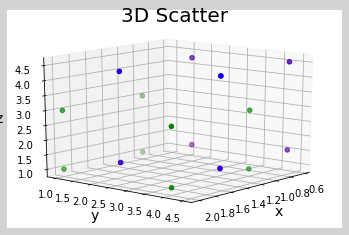


R:
 [[ 0.98639392  0.16439899  0.        ]
 [ 0.          0.         -1.        ]
 [-0.16439899  0.98639392  0.        ]]

T:
 [[-0.33659526]
 [ 5.5       ]
 [-1.15520917]]

CvVector:
 [[ 0.48539967  6.65079291 -2.15520917]]


In [13]:
# set R AND T
#    R= np.array([[ 0.57882135 -0.26450623 -0.77136392]
#     [-0.81136319 -0.09217294 -0.57722952]
#     [ 0.08158193  0.95996906 -0.26796229]] 
#   T =np.array([[3.40354576]
#       [4.47364088])
#     [0.19911117]]) 

# CV点云（地图上的数据）
a = np.array([[1, 2, 2, 1, 2, 2, 1, 1 ], 
              [1, 1, 1, 1, 4, 4, 4, 4],
              [1, 1, 3, 3, 1, 3, 3, 1]])


# FEM点云
b = np.array([[]])

# 设置转换量 B > A
r_b2a = np.array([[ 0.98639392,  0.16439899 , 0.        ],
                 [-0.    ,      0.   ,      -1.        ],
                 [-0.16439899  ,0.98639392 , 0.        ]])
t_b2a = np.array([[-0.33659527],[ 5.5] ,[-1.15520918]])


# 源点云（假设检测到的数据）
b = np.matmul(r_b2a.T, a - t_b2a)


#FEM向量
othervector= np.array([[1],[1],[1]])

classforself=ICP_3D(fromcloud=a,fromFEM=b,femVector=othervector)
(R,T)=classforself.get_R_T(a,b,othervector)
CvVector=classforself.get_CvVector()
classforself.get_plot_a_b_new_B()

#print
print("\nR:\n", R)
print("\nT:\n", T)
print("\nCvVector:\n", CvVector)





In [161]:
# test transformed A
new_A=np.matmul(b.T,np.linalg.inv(R.T)).T+T
print((new_A-a)/a*100)

[[-112.54130397  -57.62200355  -73.83822002 -144.97373691  -32.96215497
   -49.17837144  -95.65403975  -63.2216068 ]
 [ 909.72689383  925.9431103   920.5377047   904.32148823   82.50623333
    81.15488193   77.10082781   78.45217921]
 [-450.08293134 -466.52283034 -287.93387145 -282.45390511 -466.52283034
  -287.93387145 -282.45390511 -450.08293134]]


In [162]:
# test transformed B
new_B = np.matmul(R.T, a - T)
print((new_B-b)/b*100)

[[-0.00000011  0.00000011  0.00000007 -0.00000035  0.00000011  0.00000007
  -0.00000035 -0.00000011]
 [-0.00000015 -0.00000012  0.00000008  0.00000007 -0.00000012  0.00000008
   0.00000007 -0.00000015]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]
